# Import

In [2]:
from clean_data import clean_data
import pandas as pd
import numpy as np
import ta
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
import sys
sys.path.append('../../qwok/')
from visualization import Visualization as Vis
from signal_oscillator import Price_Oscillator_Signal

In [6]:
df = clean_data()
df['Flow'] = df['EB'].diff()

In [7]:
combination = []
for i in range(1, 305, 5):
    for j in range(10, 305, 5):
        combination.append([i, j])
len(combination)

3599

In [8]:
arr_res = []
for window_diff, window_rolling in combination:
    flow = df['EB'].diff(window_diff)
    flow_mean = ta.trend.ema_indicator(flow, window=window_rolling, fillna=False)
    signals = np.select([
        (flow>flow_mean), 
        (flow<=flow_mean)], [-1, 1], 0)
    vis_obj = Vis(df['Price'], signals, asset_name='BTC', method_pnl='cumsum')

    dict_res = {
        'window_diff':window_diff,
        'window_rolling':window_rolling,
        'Bt Obj':vis_obj,
    }
    for metrics, value in vis_obj.stat.items():
        dict_res[metrics] = value
    arr_res.append(dict_res)

df_bt = pd.DataFrame(arr_res)

,window_diff,window_rolling,Bt Obj,start,end,len_timeframe,leverage,resolution(hr),count_day_tradable_yearly,long_short_ratio,...,expected_return_short,hit_rate,expected_return_hit,expected_return_miss,win_rate,sharpe_ratio,sortino_ratio,calmar_ratio,time_under_water,maximum_drawdown
2487,211,55,<visualization.Visualization object at 0x2a503...,2021-05-27,2024-04-17,1057,1,24.0,252,0.81651,...,0.00190,0.53224,0.02133,-0.01797,0.39867,1.38439,1.83829,2.01005,0.64394,0.16530
2488,211,60,<visualization.Visualization object at 0x2a50b...,2021-05-27,2024-04-17,1057,1,24.0,252,0.81755,...,0.00165,0.53053,0.02126,-0.01787,0.39489,1.35754,1.79331,2.56137,0.64773,0.12746
2491,211,75,<visualization.Visualization object at 0x2a501...,2021-05-27,2024-04-17,1057,1,24.0,252,0.77880,...,0.00169,0.53307,0.02092,-0.01765,0.38920,1.37603,1.81122,2.57371,0.64015,0.12574
2492,211,80,<visualization.Visualization object at 0x2a50b...,2021-05-27,2024-04-17,1057,1,24.0,252,0.75917,...,0.00162,0.53394,0.02075,-0.01758,0.38731,1.36962,1.79061,2.75176,0.63731,0.11651
2489,211,65,<visualization.Visualization object at 0x2a507...,2021-05-27,2024-04-17,1057,1,24.0,252,0.80184,...,0.00152,0.52625,0.02122,-0.01790,0.38920,1.25820,1.66003,2.31569,0.65625,0.13374


<Axes: xlabel='window_rolling', ylabel='window_diff'>

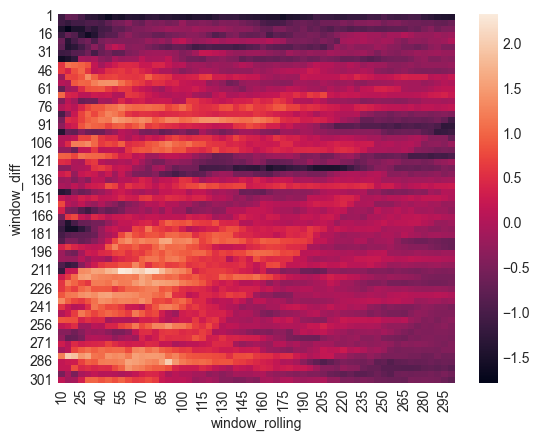

In [9]:
metric = 'total_return'
display(df_bt.loc[(1 * df_bt[metric]).sort_values(ascending=False)[:5].index])
this = pd.pivot(df_bt, index="window_diff", columns="window_rolling", values=metric)
sns.heatmap(this)

In [10]:
window_diff = 216
window_rolling = 125
idx = df_bt.loc[(df_bt['window_diff']==window_diff)&(df_bt['window_rolling']==window_rolling)].index[0]
this_obj = df_bt.loc[idx, 'Bt Obj']

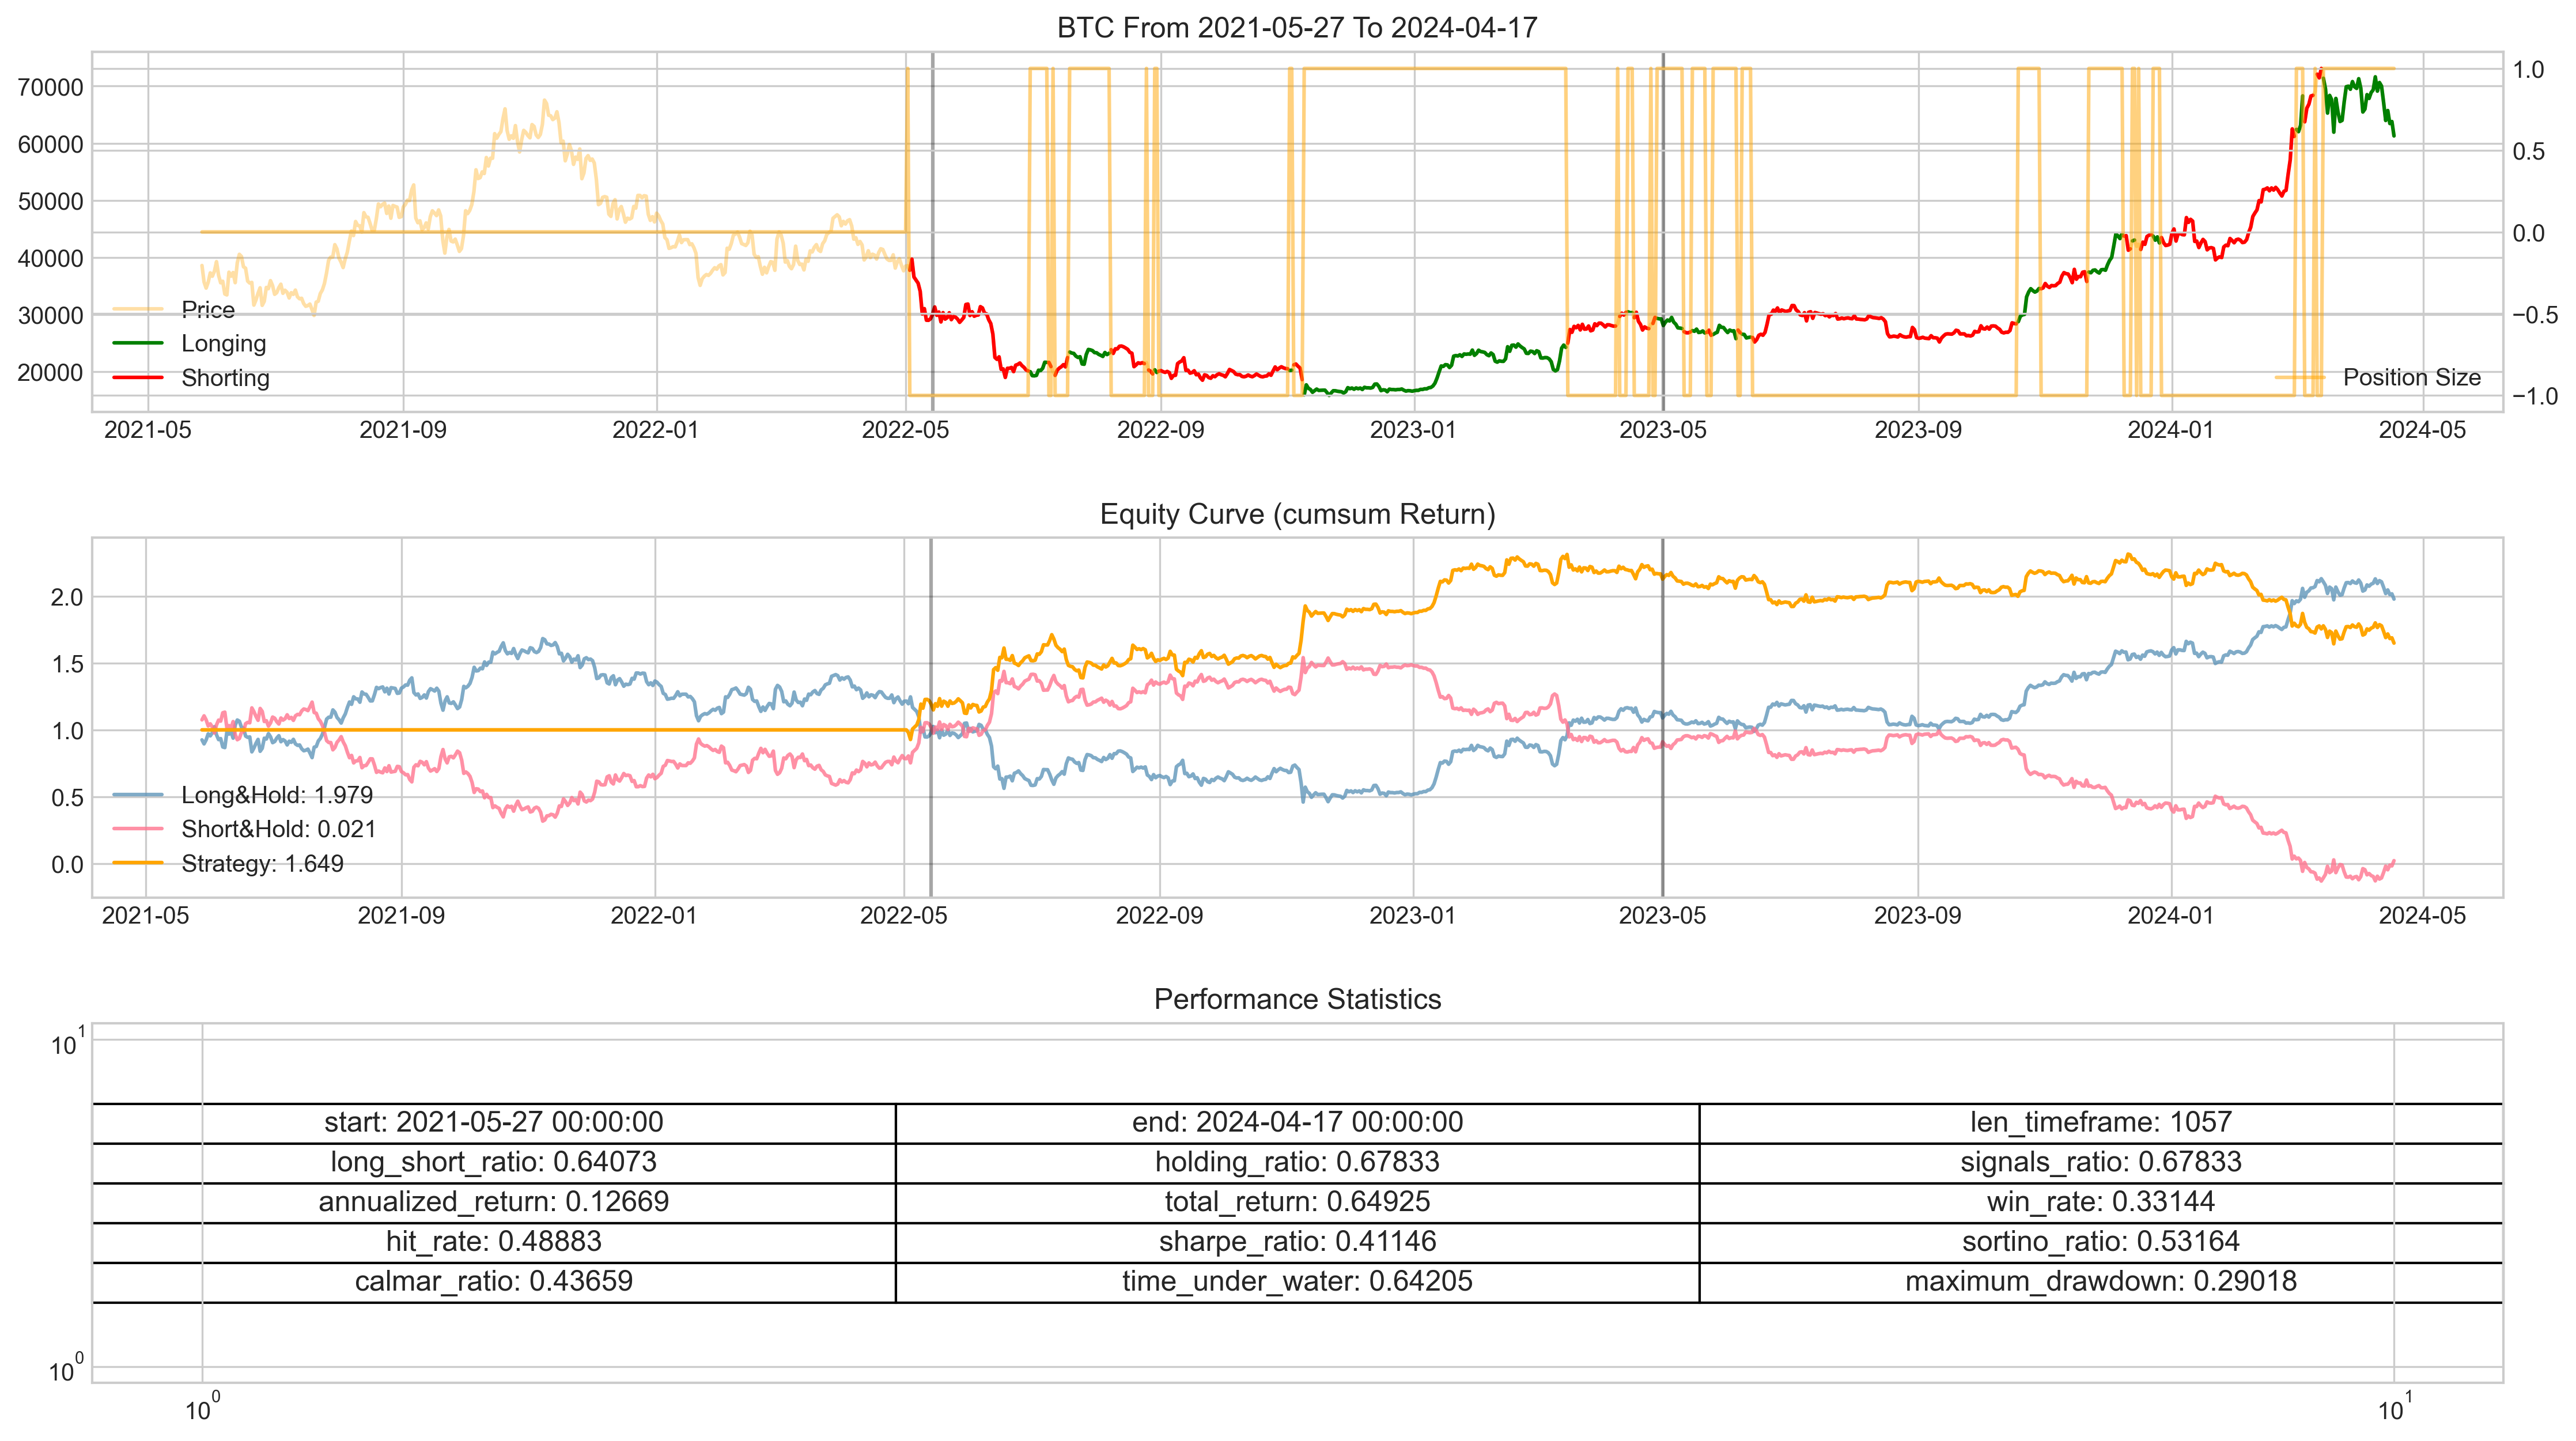

In [11]:
this_obj.plot_general()

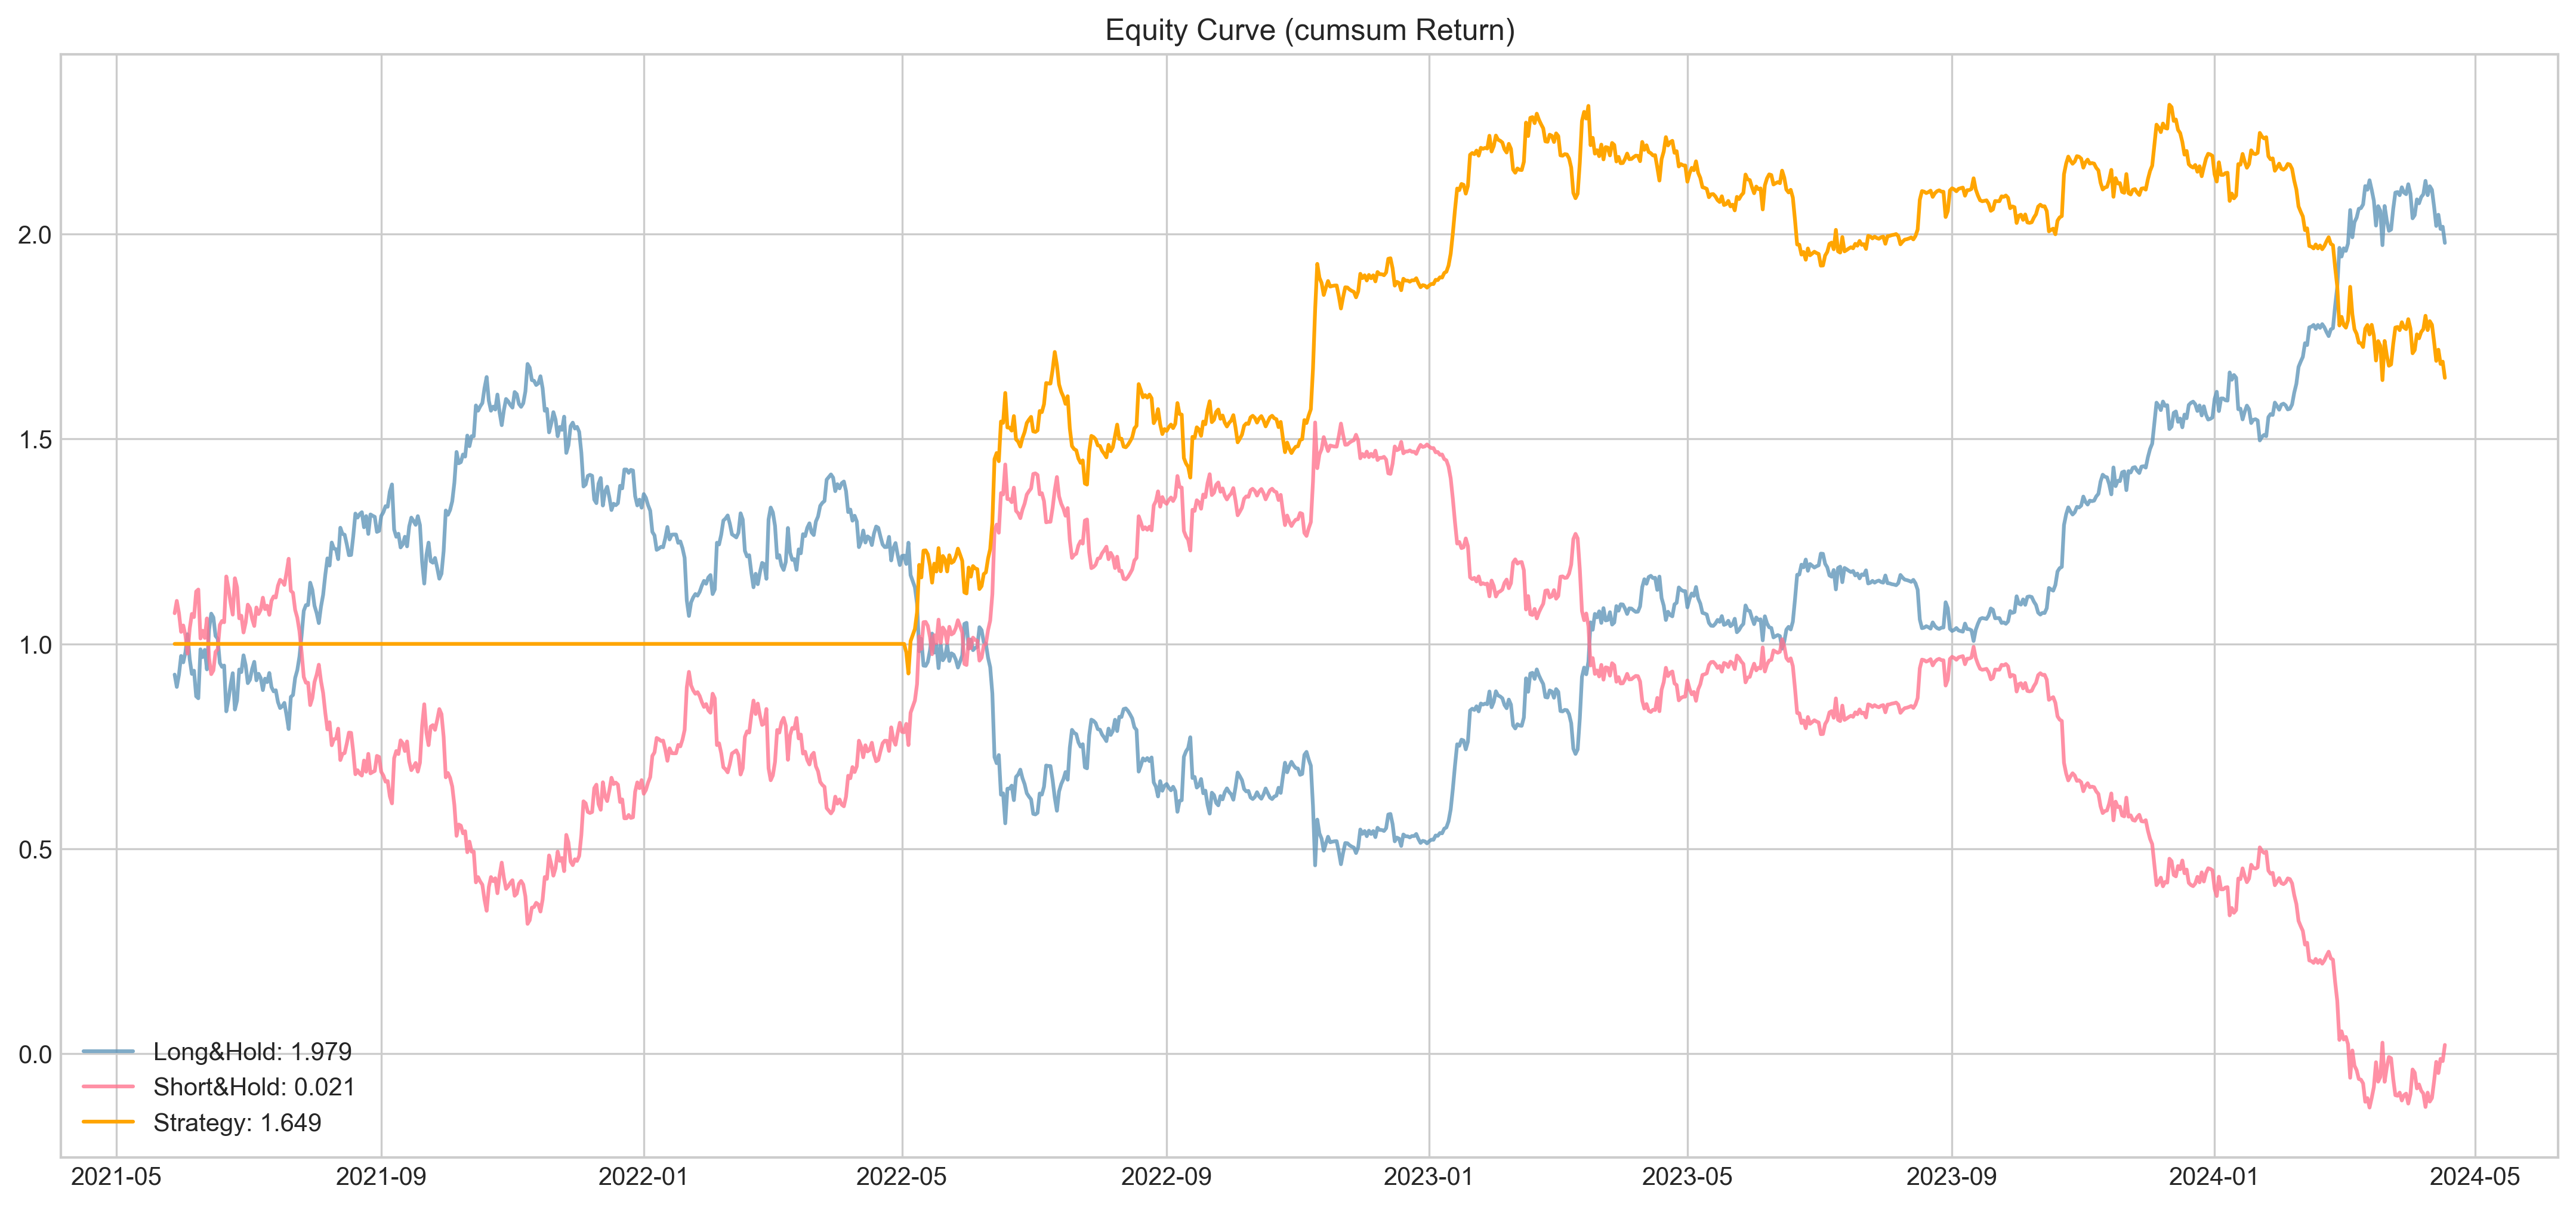

In [12]:
this_obj.plot_equityCurve()